### Задача 1

Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. Найдите M(X), D(X).

$$P(X = k) = C_n^k p^k (1 - p)^{n - k}$$

[0.2373046875,
 0.3955078125,
 0.263671875,
 0.087890625,
 0.0146484375,
 0.0009765625]

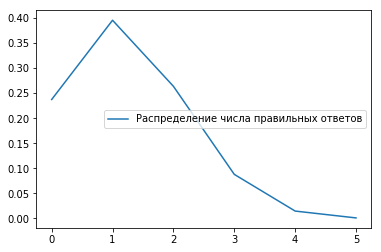

In [115]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

A=[0,1,2,3,4,5]
P=[]
n = 5
p = 1/4 #один из четырех правильный
for k in A:
    P.append(np.math.factorial(n)/(np.math.factorial(k) * np.math.factorial(n-k))  * p**k * (1-p)**(n-k)  )           
np.sum(P), P
plt.plot(A,P, label="Распределение числа правильных ответов")
plt.legend()
P

In [116]:

#математическое ожидание 
m=np.array(A).dot(P)
m

1.25

In [117]:
#математическая дисперсия

((np.array(P) - m ) ** 2).dot(P)

0.9312369003891945

### Задача 2

Вероятность попадания в цель при одном выстреле равна 0.01. Какова вероятность того, что число попаданий при 200 выстрелах будет не менее 5 и не более 10?

Счетчик с достаточно малой вероятностью и большим числом повторений - берем формуру Пуассона

$$P(X = k) = \dfrac{a^k e ^{-a}}{k!}.$$

Здесь $a = np = 200 \cdot 0.01 = 2$. 

Искомая вероятность: 0.052644709119342686


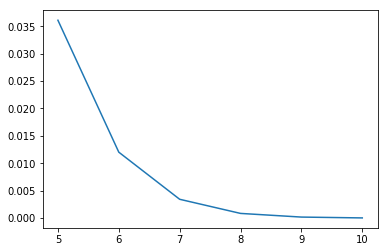

In [60]:
K=[5,6,7,8,9,10]
P=[]
a = 200*0.01

for k in K:
    P.append( a**k * np.e ** -a / np.math.factorial(k))
plt.plot(K,P)
print(f'Искомая вероятность: {np.sum(P)}')

### Задача 3

В условиях предыдущей задачи сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 10 раз будет совершено попадание?

Подсказка. Как посчитать P(X >= k) для величины X, имеющей распределение Пуассона? Здесь предстоит немножко покодить.

При x=1421. Вероятность становится 0.9001760722984113


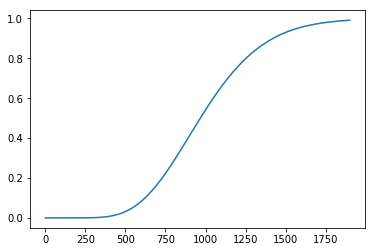

In [108]:
#a = x*0.01
#k >= 10
#a**k * np.e ** -a / np.math.factorial(k) = 0.9

K=[0,1,2,3,4,5,6,7,8,9] # 1-sum(p(K)) 
X=[i for i in range(0,1900)]
P=[]

# Посчитать вероятность  X >= 10
def pk(x):
    pk=0
    for k in K:
        pk+=(x*0.01)**k * np.e ** -(x*0.01) / np.math.factorial(k)
    return 1-pk


for x in X:
    P.append(pk(x))
P
plt.plot(X,P)

#Подобрала
x=1421
print(f'При x={x}. Вероятность становится {pk(x)}')